In [217]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from scipy.stats import gaussian_kde
import glob
import itertools
from scipy.optimize import curve_fit

In [218]:
period = 5
dealias = 2 / 3
eta = 0.01172
diss_length = dealias * np.pi / eta

data_folder = 'data'
line_styles = ['k-', 'k--', 'k-.', 'k:']

8 files found.
['data/ns3d_strat_256_001/spectra1d.h5', 'data/ns3d_strat_256_002/spectra1d.h5', 'data/ns3d_strat_256_005/spectra1d.h5', 'data/ns3d_strat_256_010/spectra1d.h5', 'data/ns3d_strat_256_020/spectra1d.h5', 'data/ns3d_strat_256_050/spectra1d.h5', 'data/ns3d_strat_256_100/spectra1d.h5', 'data/ns3d_strat_256_200/spectra1d.h5']
Plot saved as 'multi_1d_spectra.png'


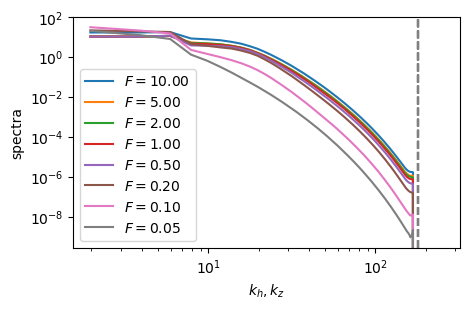

In [219]:
file_name = 'spectra1d.h5'

files = sorted(glob.glob(data_folder + "/ns3d_strat*/" + file_name))
print(f"{len(files)} files found.")
print(files)

k53 = False

line_style_cycle = itertools.cycle(line_styles)

plt.figure(figsize=(5, 3))

for file in files:
    N = float(file.split('/')[1].split('_')[-1])/10
    with h5py.File(file, 'r') as hdf_file:
        kx = dealias * hdf_file['kx'][:]
        ky = dealias * hdf_file['ky'][:]
        kz = dealias * hdf_file['kz'][:]
        spectra_E_kx = hdf_file['spectra_E_kx'][:]
        spectra_E_ky = hdf_file['spectra_E_ky'][:]
        spectra_E_kz = hdf_file['spectra_E_kz'][:]
        times = hdf_file['times'][:]
        
    kh = np.sqrt(kx**2 + ky**2)    
    spectra_E_kh = np.sqrt(spectra_E_kx**2 + spectra_E_ky**2)
    
    filtered_spectra_E_kh = spectra_E_kh[times > period]
    filtered_spectra_E_kz = spectra_E_kz[times > period]

    spectra_E_kh_mean = np.sum(filtered_spectra_E_kh, axis=0)
    spectra_E_kz_mean = np.sum(filtered_spectra_E_kz, axis=0)
        
    if k53:
        power = 5/3
    else:
        power = 0
        
    line_style = next(line_style_cycle)
        
    plt.loglog(kh[1:], spectra_E_kh_mean[1:] * kh[1:]**(power), label=f'$F = {1/N:.2f}$')
    plt.axvline(diss_length, color='gray', linestyle='--')
    #plt.loglog(kz[1:], spectra_E_kz_mean[1:] * kz[1:]**(power), '--', label=f'$E(k_z)$ for $N = {N:.1f}$')

    #plt.loglog(kh[1:], 10**-2 * kh[1:]**(-5/3), 'k--')


    plt.xlabel('$k_h, k_z$')
    plt.ylabel('spectra')

    #plt.ylim(bottom=10*

plt.legend()
#plt.savefig('multi_1d_spectra.png', dpi=300)
print("Plot saved as 'multi_1d_spectra.png'")
plt.show()

8 files found.
['data/ns3d_strat_256_001/state_phys_t0060.001.h5', 'data/ns3d_strat_256_002/state_phys_t0040.001.h5', 'data/ns3d_strat_256_005/state_phys_t0040.001.h5', 'data/ns3d_strat_256_010/state_phys_t0040.000.h5', 'data/ns3d_strat_256_020/state_phys_t0040.001.h5', 'data/ns3d_strat_256_050/state_phys_t0060.002.h5', 'data/ns3d_strat_256_100/state_phys_t0060.001.h5', 'data/ns3d_strat_256_200/state_phys_t0040.003.h5']
Plot saved as 'multi_richardson_pdf.png'


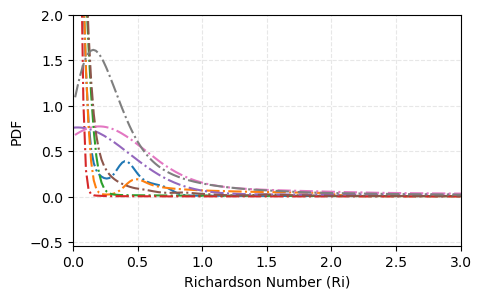

In [224]:
file_name = 'state_phys*.h5'

files = sorted(glob.glob(data_folder + "/ns3d_strat*/" + file_name))
print(f"{len(files)} files found.")
print(files)

line_style_cycle = itertools.cycle(line_styles)

Lz = 0.75
nz = 64
dz = Lz / nz

Lfh = 1.0
eps = 1.0

plt.figure(figsize=(5, 3))

for file in files:
    all_Ri = []
    N = float(file.split('/')[1].split('_')[-1])/10
    
    with h5py.File(file, 'r') as f:
        u = f['state_phys/vx'][:]
        v = f['state_phys/vy'][:]
        w = f['state_phys/vz'][:]
        
        uh = np.sqrt(u**2 + v**2)
        duh_dz = np.gradient(uh, dz, axis=0).ravel()
        
        Ri = (N**2 / (duh_dz[duh_dz!=0]**2))
        all_Ri.append(Ri[Ri < 10])
            
    all_Ri_array = np.concatenate(all_Ri)
    
    line_style = next(line_style_cycle)

    # Compute and plot the KDE
    kde = gaussian_kde(all_Ri_array)
    x_vals = np.linspace(np.min(all_Ri_array), np.max(all_Ri_array), 500)
    plt.plot(x_vals, kde(x_vals), linestyle = '-.', label=f'$F_h = {1/N:.2f}$')

plt.xlabel('Richardson Number (Ri)')
plt.ylabel('PDF')
#plt.legend()

plt.xlim((0.0, 3.0))
plt.ylim(top=2)
plt.grid(alpha=0.3, linestyle='--')
#plt.savefig('multi_richardson_pdf.png', dpi=300)
print("Plot saved as 'multi_richardson_pdf.png'")
plt.show()

8 files found.
['data/ns3d_strat_256_001/spect_energy_budg.h5', 'data/ns3d_strat_256_002/spect_energy_budg.h5', 'data/ns3d_strat_256_005/spect_energy_budg.h5', 'data/ns3d_strat_256_010/spect_energy_budg.h5', 'data/ns3d_strat_256_020/spect_energy_budg.h5', 'data/ns3d_strat_256_050/spect_energy_budg.h5', 'data/ns3d_strat_256_100/spect_energy_budg.h5', 'data/ns3d_strat_256_200/spect_energy_budg.h5']


/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_53389/2599034072.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()
/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_53389/2599034072.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


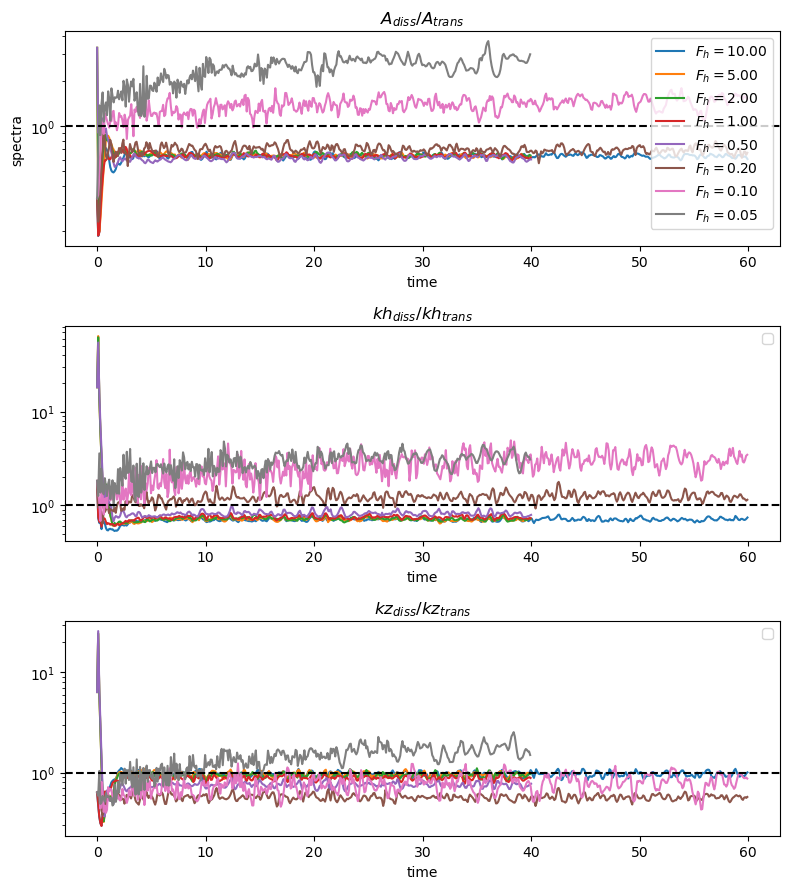

In [221]:
file_name = 'spect_energy_budg.h5'

files = sorted(glob.glob(data_folder + "/ns3d_strat*/" + file_name))
print(f"{len(files)} files found.")
print(files)

line_style_cycle = itertools.cycle(line_styles)

fig, axes = plt.subplots(3, 1, figsize=(8, 9))  

for file in files:
    N = float(file.split('/')[1].split('_')[-1])/10
    with h5py.File(file, 'r') as hdf_file:
        diss_A = hdf_file['diss_A'][:]
        transfer_A = hdf_file['transfer_A'][:]
        diss_Kh = hdf_file['diss_Kh'][:]
        transfer_Kh = hdf_file['transfer_Kh'][:]
        diss_Kz = hdf_file['diss_Kz'][:]
        transfer_Kz = hdf_file['transfer_Kz'][:]
        times = hdf_file['times'][:]

    diss_A = np.mean(diss_A, axis=(1,2))
    transfer_A = np.mean(np.abs(transfer_A), axis=(1,2))

    diss_Kh = np.mean(diss_Kh, axis=(1,2))
    transfer_Kh = np.mean(np.abs(transfer_Kh), axis=(1,2))
    
    diss_Kz = np.mean(diss_Kz, axis=(1,2))
    transfer_Kz = np.mean(np.abs(transfer_Kz), axis=(1,2))
    
    line_style = next(line_style_cycle)

    axes[0].semilogy(times, diss_A / transfer_A, label=f'$F_h = {1/N:.2f}$')

    axes[1].semilogy(times, diss_Kh / transfer_Kh)#, line_style)
    
    axes[2].semilogy(times, diss_Kz / transfer_Kz)#, line_style)
    
    
axes[0].axhline(1, color='k', linestyle='--')
axes[0].set_xlabel('time')
axes[0].set_ylabel('spectra')
axes[0].legend()
axes[0].set_title('$A_{diss} / A_{trans}$')

axes[1].axhline(1, color='k', linestyle='--')
axes[1].set_xlabel('time')
axes[1].legend()
axes[1].set_title('$kh_{diss} / kh_{trans}$')

axes[2].axhline(1, color='k', linestyle='--')
axes[2].set_xlabel('time')
axes[2].legend()
axes[2].set_title('$kz_{diss} / kz_{trans}$')

plt.tight_layout()
#plt.savefig('spectra_transfer.png', dpi=300)
plt.show()

8 files found.
['data/ns3d_strat_256_001/spect_energy_budg.h5', 'data/ns3d_strat_256_002/spect_energy_budg.h5', 'data/ns3d_strat_256_005/spect_energy_budg.h5', 'data/ns3d_strat_256_010/spect_energy_budg.h5', 'data/ns3d_strat_256_020/spect_energy_budg.h5', 'data/ns3d_strat_256_050/spect_energy_budg.h5', 'data/ns3d_strat_256_100/spect_energy_budg.h5', 'data/ns3d_strat_256_200/spect_energy_budg.h5']


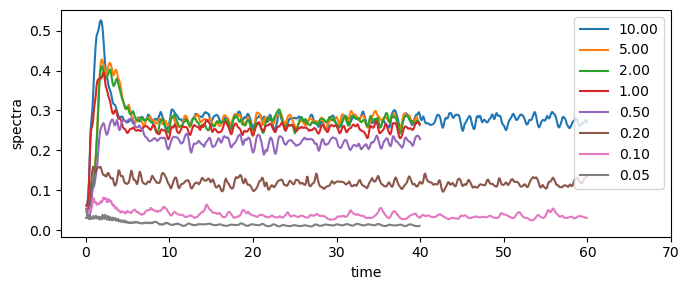

[10.0, 5.0, 2.0, 1.0, 0.5, 0.2, 0.1, 0.05]
[np.float64(0.2766), np.float64(0.2762), np.float64(0.2714), np.float64(0.2546), np.float64(0.223), np.float64(0.1183), np.float64(0.0374), np.float64(0.0137)]


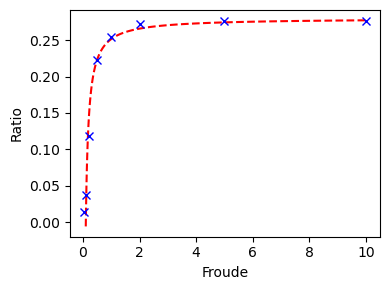

In [222]:
file_name = 'spect_energy_budg.h5'

files = sorted(glob.glob(data_folder + "/ns3d_strat*/" + file_name))
print(f"{len(files)} files found.")
print(files)

line_style_cycle = itertools.cycle(line_styles)

diss_ratio = []
transfer_ratio = []
Froude = []

plt.figure(figsize=(7, 3))  

for file in files:
    N = float(file.split('/')[1].split('_')[-1])/10
    with h5py.File(file, 'r') as hdf_file:
        diss_Kh = hdf_file['diss_Kh'][:]
        transfer_Kh = hdf_file['transfer_Kh'][:]
        diss_Kz = hdf_file['diss_Kz'][:]
        transfer_Kz = hdf_file['transfer_Kz'][:]
        
        times = hdf_file['times'][:]

    diss_Kh = np.sum(diss_Kh, axis=(1,2))
    transfer_Kh = np.sum(np.abs(transfer_Kh), axis=(1,2))

    diss_Kz = np.sum(diss_Kz, axis=(1,2))
    transfer_Kz = np.sum(np.abs(transfer_Kz), axis=(1,2))
    
    
    F = 1/N
    Froude.append(F)
    ratio = np.mean(diss_Kz[times>5.0] / diss_Kh[times>5.0])
    diss_ratio.append(np.round(ratio, 4))
    
    transfer_ratio.append(np.mean(transfer_Kz[times>5.0] / transfer_Kh[times>5.0]))
    
    line_style = next(line_style_cycle)

    plt.plot(times[1:], diss_Kz[1:] / diss_Kh[1:], label=f'{F:.2f}')
    
plt.xlim(right=70)
plt.xlabel('time')
plt.ylabel('spectra')
plt.legend()
#plt.title('Dissipation for $k_z / k_h$')
plt.tight_layout()
plt.savefig('KzKh.png', dpi=300)
plt.show()

print(Froude)
print(diss_ratio)

X = np.logspace(-1, 1, 100)
Y = - X ** -1 / 35 + 0.28

plt.figure(figsize=(4,3))
plt.plot(X, Y, 'r--')
plt.plot(Froude, diss_ratio, 'bx')
plt.xlabel('Froude')
plt.ylabel('Ratio')
#plt.title('Ratio between horizontal and vertical dissipation')
plt.tight_layout()
plt.show()

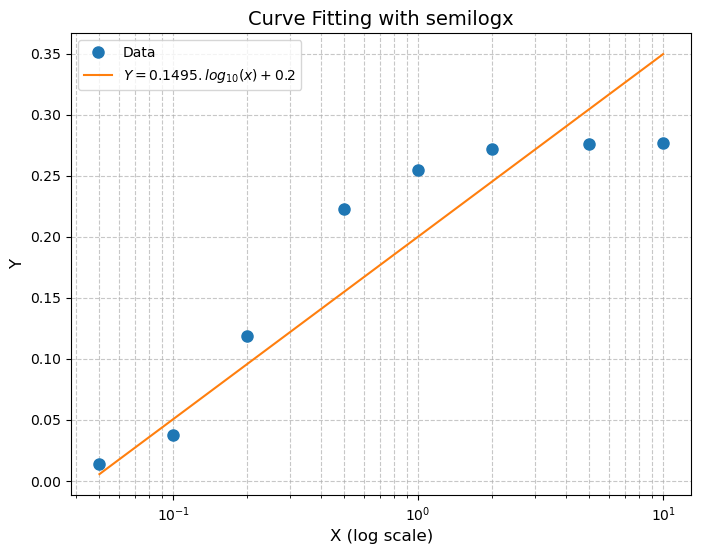

In [223]:
def model(x, a, b):
    return a * x**b

# Input dataset
X = Froude
Y = diss_ratio

Y_temp = 0. * np.log10(X) + 0.2

print()

a, b = 0.1495, 0.2

X_fit = np.logspace(np.log10(min(X)), np.log10(max(X)), 500)
Y_fit = a * np.log10(X_fit) + b

log = 'log_{10}'

# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.semilogx(X, Y, 'o', label='Data', markersize=8)
plt.semilogx(X_fit, Y_fit, '-', label=f'$Y = {a} . {'log_{10}'} (x) + {b}$')
plt.xlabel('X (log scale)', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.title('Curve Fitting with semilogx', fontsize=14)
plt.show()

In [123]:
nu = 2.662e-03
epsilon = 0.5
kmin, kmax = 3, 4
Lmax, Lmin = 2 * np.pi/ kmin, 2 * np.pi/ kmax

Remax, Remin = (epsilon)**(1/3) * Lmax**(4/3)/nu, (epsilon)**(1/3) * Lmin**(4/3)/nu

print(Lmax,Lmin)
print(Remin, Remax)

2.0943951023931953 1.5707963267948966
544.4296715691796 798.9631856271229
